In [8]:
'''
Imports
'''

proj_dir = '/Users/prabh/200 RESEARCH/Cluster Expansion Project'

# gives the notebook access to the cluster_expansion personal library
from sys import path
path.append(proj_dir)
import cluster_expansion as ce
from cluster_expansion import os, pd, np, plt, sns, tf, Markdown, display, train_test_split

import napari

#### Load in Tensors

In [31]:
seqs = '100M'
tensor_dir = f'../InteractionTensors/{seqs} Sequences/Symmetric'
consolidated = False

if consolidated:
  W = np.zeros((200))
  J = np.load(f'{tensor_dir}/JC_{seqs}.npy')
  G = np.load(f'{tensor_dir}/GC_{seqs}.npy')
else:
  W = np.load(f'{tensor_dir}/W_{seqs}.npy')
  J = np.load(f'{tensor_dir}/J_{seqs}.npy')
  G = np.load(f'{tensor_dir}/G_{seqs}.npy')

#### `Visualize W`

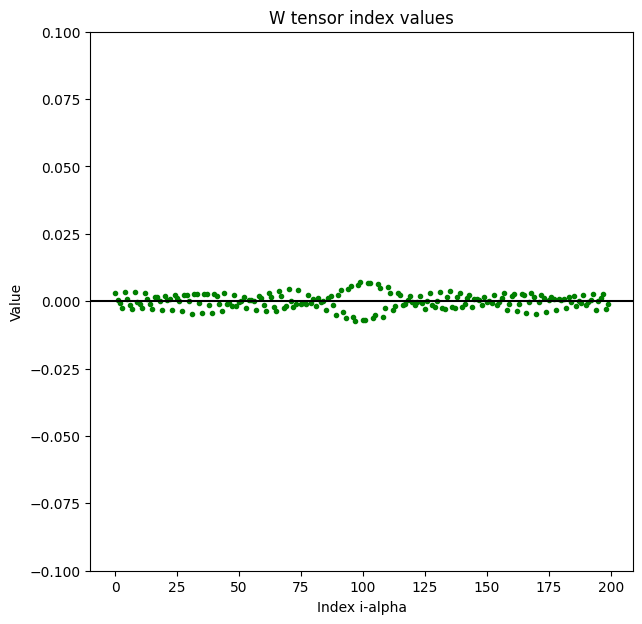

sum(W) = -0.0000


In [32]:
plt.figure(figsize=(7,7))
plt.plot(W, color = 'g', marker = ".", linestyle = "")
plt.axline((0,0), (199,0), color = "#000000")
plt.xlabel("Index i-alpha")
plt.ylabel("Value")
plt.ylim(-0.1, 0.1)
plt.title("W tensor index values")
plt.show()

print(f"sum(W) = {np.sum(W):.4f}")

#### `Visualize J`

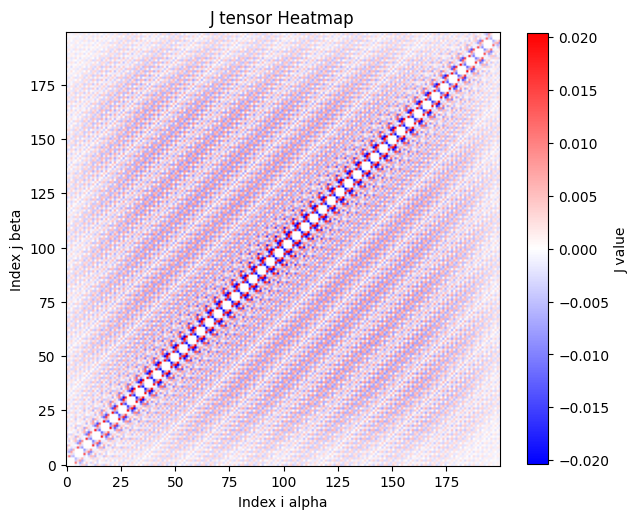

sum(J) = 0.0000


In [33]:
vmax = np.percentile(np.abs(J), 99)

plt.figure(figsize=(7, 7))
plt.imshow(J, cmap='bwr', vmin=-vmax, vmax=vmax, origin = 'lower')
plt.colorbar(label='J value', shrink=0.8)
plt.title("J tensor Heatmap")
plt.xlabel("Index i alpha")
plt.ylabel("Index j beta")
plt.show()

print(f"sum(J) = {np.sum(J):.4f}")

#### `Visualize G`

In [37]:
# interactive 3D slices
vmax = np.percentile(np.abs(G), 99)
try:
    viewer = napari.Viewer()
    viewer.add_image(G, name='G', colormap='bwr', contrast_limits=[-vmax, vmax])
    napari.run()
except Exception as e:
    print(e)
    pass

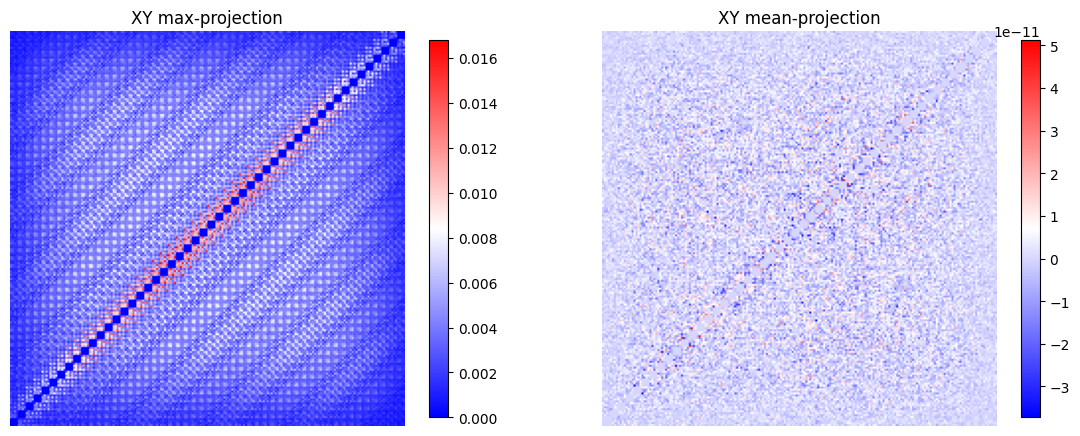

In [35]:
# 2. projections (max and mean) along Z axis
fig, ax = plt.subplots(1, 2, figsize = (14, 7))
im0 = ax[0].imshow(G.max(axis=2), cmap = 'bwr', origin = 'lower')
ax[0].set_title('XY max-projection')
ax[0].axis('off')
plt.colorbar(im0, ax=ax[0], shrink = 0.7)

im1 = ax[1].imshow(G.mean(axis=2), cmap = 'bwr', origin = 'lower')
ax[1].set_title('XY mean-projection')
ax[1].axis('off')
plt.colorbar(im1, ax=ax[1], shrink = 0.7)

plt.show()

In [36]:
print(f"sum(G) = {np.sum(G):.4f}")

sum(G) = 0.0000
